<a href="https://colab.research.google.com/github/pavithrapavi956/codeAlpha/blob/main/Copy_of_HANDWRITING_CHARACTER_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HANDWRITING CHARACTER RECOGNITION**

**Importing the Libraries**

In [ ]:
!pip install simplejson
!pip install unidecode
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import io
import zipfile
from zipfile import ZipFile
import requests
import tensorflow as tf
from tensorflow.python.ops.rnn_cell_impl import LSTMCell, ResidualWrapper, DropoutWrapper, MultiRNNCell

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Reshape,\
                                    Bidirectional, LSTM, Dense, Lambda,\
                                    Activation,BatchNormalization, Dropout

from tensorflow.keras.optimizers import Adam
from imgaug import augmenters as iaa
import os
import cv2
import sys
import csv
import math
import unidecode
import simplejson
import glob
from shutil import copyfile
import random
from random import sample
import argparse
import time
from PIL import Image
import re
import tarfile
import warnings

warnings.filterwarnings('ignore')
!pip install gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.9 MB/s eta 0:00:00


**Creating Individual Directories to Store the Data**

In [ ]:
!mkdir datasets
!mkdir datasets/raw
!mkdir datasets/raw/iam
!mkdir datasets/raw/iam/words
!mkdir datasets/raw/breta
!mkdir datasets/raw/cvl
!mkdir datasets/raw/orand
!tree -a datasets/

/bin/bash: line 1: tree: command not found


In [4]:
!gdown 1eVyNNqGaYq0SFPKURC83Kg1M5Z7AY_pD

with ZipFile("data_2.zip", 'r') as zObject:
    zObject.extractall(path="datasets/raw/breta/")
!rm -r data_2.zip

Downloading...
From (original): https://drive.google.com/uc?id=1eVyNNqGaYq0SFPKURC83Kg1M5Z7AY_pD
From (redirected): https://drive.google.com/uc?id=1eVyNNqGaYq0SFPKURC83Kg1M5Z7AY_pD&confirm=t&uuid=2e42318c-e962-4eee-9bc1-de2192178e14
To: /content/data_2.zip
100% 84.3M/84.3M [00:01<00:00, 53.5MB/s]


In [ ]:
!wget --save-cookies cookies.txt \
    --keep-session-cookies \
    --post-data 'email=rahuldhanola31@gmail.com&password=@IAM@HANDWRITING@Dataset' \
    --delete-after \
    https://fki.tic.heia-fr.ch/login

!wget --load-cookies cookies.txt \
https://fki.tic.heia-fr.ch/DBs/iamDB/data/ascii.tgz

!wget --load-cookies cookies.txt \
https://fki.tic.heia-fr.ch/DBs/iamDB/data/words.tgz

tarfile.open('./ascii.tgz').extractall('datasets/raw/iam/')

tarfile.open('./words.tgz').extractall('datasets/raw/iam/words')

!rm -r words.tgz ascii.tgz cookies.txt datasets/raw/iam/lines.txt datasets/raw/iam/forms.txt datasets/raw/iam/sentences.txt

--2024-10-15 15:41:20--  https://fki.tic.heia-fr.ch/login
Resolving fki.tic.heia-fr.ch (fki.tic.heia-fr.ch)... 160.98.46.146
Connecting to fki.tic.heia-fr.ch (fki.tic.heia-fr.ch)|160.98.46.146|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: http://fki.tic.heia-fr.ch/ [following]
--2024-10-15 15:41:20--  http://fki.tic.heia-fr.ch/
Connecting to fki.tic.heia-fr.ch (fki.tic.heia-fr.ch)|160.98.46.146|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://fki.tic.heia-fr.ch/ [following]
--2024-10-15 15:41:21--  https://fki.tic.heia-fr.ch/
Connecting to fki.tic.heia-fr.ch (fki.tic.heia-fr.ch)|160.98.46.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4462 (4.4K) [text/html]
Saving to: ‘login.tmp’

login.tmp           100%[===================>]   4.36K  --.-KB/s    in 0s      

2024-10-15 15:41:21 (1.04 GB/s) - ‘login.tmp’ saved [4462/4462]

Removing login.tmp.
--2024-10-15 15:41:21--  https

In [3]:
r = requests.get(
    'https://zenodo.org/record/1492267/files/cvl-database-1-1.zip?download=1')

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("datasets/raw/cvl/")

In [5]:
import tarfile
!wget https://www.orand.cl/orand_car/ORAND-CAR-2014.tar.gz

tarfile.open('./ORAND-CAR-2014.tar.gz').extractall('datasets/raw/orand/')

!rm -r ORAND-CAR-2014.tar.gz

--2024-10-16 15:51:14--  https://www.orand.cl/orand_car/ORAND-CAR-2014.tar.gz
Resolving www.orand.cl (www.orand.cl)... 162.241.225.60
Connecting to www.orand.cl (www.orand.cl)|162.241.225.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203530245 (194M) [application/x-gzip]
Saving to: ‘ORAND-CAR-2014.tar.gz’

ORAND-CAR-2014.tar. 100%[===================>] 194.10M  65.4MB/s    in 3.0s    

2024-10-16 15:51:18 (65.4 MB/s) - ‘ORAND-CAR-2014.tar.gz’ saved [203530245/203530245]



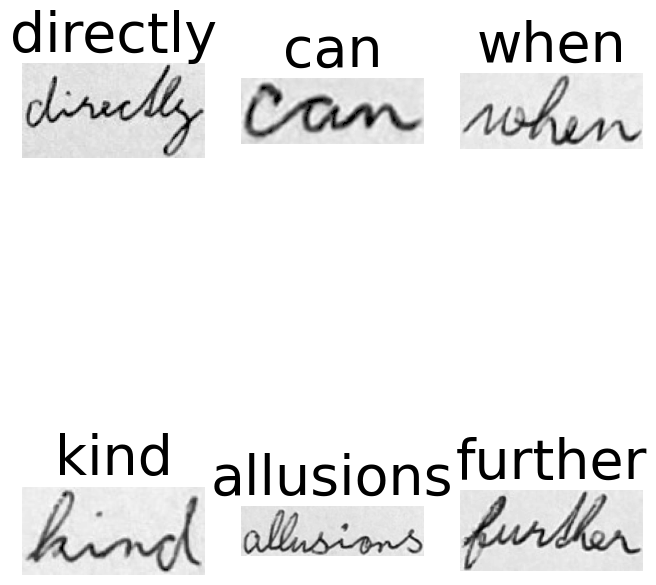

In [6]:
plt.figure(figsize=(8, 10))

img_list = sample(os.listdir('datasets/raw/breta/raw/breta/en_raw/'), 6)

for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    img_dir = 'datasets/raw/breta/raw/breta/en_raw/' + img_list[i]
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title(img_list[i].split('_')[0], fontsize=40)
    plt.axis('off')

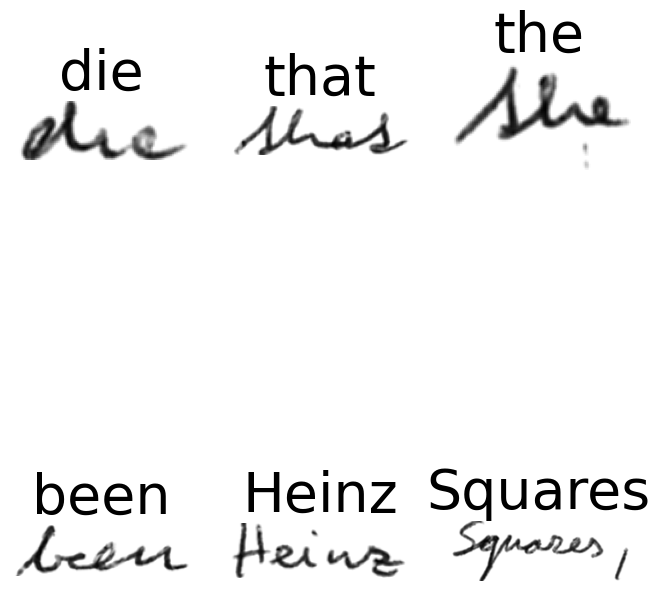

In [9]:
plt.figure(figsize=(8, 10))

img_list = sample(
    os.listdir('datasets/raw/cvl/cvl-database-1-1/trainset/words/0018'), 6)

for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    img_dir = 'datasets/raw/cvl/cvl-database-1-1/trainset/words/0018/' + \
        img_list[i]
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title(img_list[i].split('-')[4].split('.')[0], fontsize=40)
    plt.axis('off')

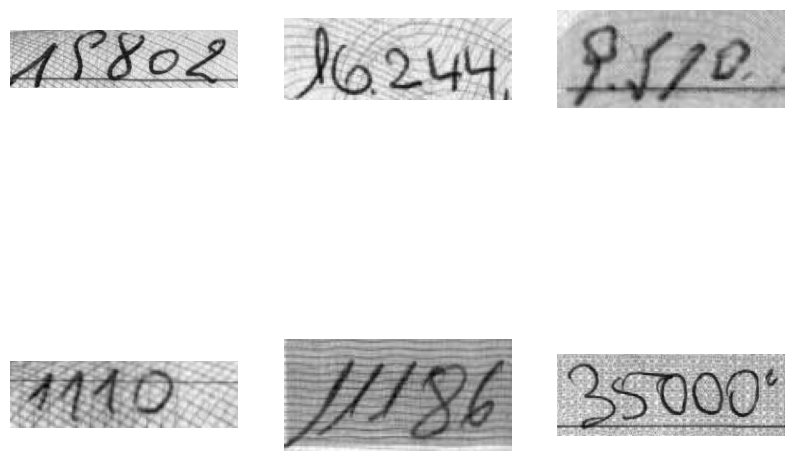

In [10]:
plt.figure(figsize=(10, 8))

img_list = sample(
    os.listdir('datasets/raw/orand/ORAND-CAR-2014/CAR-A/a_train_images/'), 6)

for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    img_dir = 'datasets/raw/orand/ORAND-CAR-2014/CAR-A/a_train_images/' + \
        img_list[i]
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

**Creating Various Helping Functions**

In [11]:
def print_progress_bar(iteration, total, prefix='', suffix=''):
    if iteration % (total // 100) == 0:
        length = 40
        iteration += 1
        percent = (100 * iteration) // (total * 99 / 100)
        filled_length = int(length * percent / 100)
        bar = '█' * filled_length + '-' * (length - filled_length)
        print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end='\r')

        if iteration >= total * 99 / 100:
            print()

**Google Drive Data**

In [12]:
def extract_breta(location, output, number=1):

    output = os.path.join(location, output)

    if not os.path.exists(output):
        os.makedirs(output)


    for sub in [
            'raw/breta/words', 'raw/breta/archive', 'raw/breta/cz_raw',
            'raw/breta/en_raw'
    ]:
        folder = os.path.join(location, sub)


        img_list = os.listdir(os.path.join(folder))

        for i, data in enumerate(img_list):
            word = data.split('_')[0]
            img = os.path.join(folder, data)
            out = os.path.join(
                output,
                '%s_%s_%s.png' % (word, number, data.split('_')[-1][:-4]))
            Image.open(img).save(out)

            print_progress_bar(i, len(img_list))

    print("\tNumber of words:", len([n for n in os.listdir(output)]))

**IAM Data**

In [13]:
prohibited = [
    ',', '(', ')', ';', ':', '/', '\\', '#', '"', '?', '!', '*', '_', '&'
]

def extract_iam(location, output, number=2):

    output = os.path.join(location, output)
    err_output = os.path.join(location, 'words_with_error')

    if not os.path.exists(output):
        os.makedirs(output)

    if not os.path.exists(err_output):
        os.makedirs(err_output)

    folder = os.path.join(location, 'words')
    label_file = os.path.join(location, 'words.txt')

    length = len(open(label_file).readlines())

    with open(label_file) as fp:
        for i, line in enumerate(fp):
            if line[0] != '#':
                l = line.strip().split(" ")
                impath = os.path.join(
                    folder, l[0].split('-')[0],
                    l[0].split('-')[0] + '-' + l[0].split('-')[1],
                    l[0] + '.png')
                word = l[-1]

                if (os.stat(impath).st_size != 0
                        and word not in ['.', '-', "'"]
                        and not any(i in word for i in prohibited)):

                    out = output if l[1] == 'ok' else err_output
                    outpath = os.path.join(
                        out, "%s_%s_%s.png" % (word, number, time.time()))

                    copyfile(impath, outpath)

            print_progress_bar(i, length)

    print("\tNumber of words:", len([n for n in os.listdir(output)]))

**CVL Data**

In [14]:
def extract_cvl(location, output, number=3):

    output = os.path.join(location, output)
    if not os.path.exists(output):
        os.makedirs(output)

    for sub in ['cvl-database-1-1/testset', 'cvl-database-1-1/trainset']:
        folder = os.path.join(location, sub)

        images = glob.glob(os.path.join(folder, 'words', '*', '*.tif'))

        for i, im in enumerate(images):
            word = re.search('\/\d+-\d+-\d+-\d+-(.+?).tif', im).group(1)
            word = unidecode.unidecode(word)

            if os.stat(im).st_size != 0:
                outpath = os.path.join(
                    output, '%s_%s_%s.png' % (word, number, time.time()))
                Image.open(im).save(outpath)

            print_progress_bar(i, len(images))
    print("\tNumber of words:", len([n for n in os.listdir(output)]))

**ORAND Data**

In [15]:
def extract_orand(location, output, number=4):

    output = os.path.join(location, output)
    if not os.path.exists(output):
        os.makedirs(output)


    for sub in ['ORAND-CAR-2014/CAR-A', 'ORAND-CAR-2014/CAR-B']:
        folder = os.path.join(location, sub)


        l_files = glob.glob(os.path.join(folder, '*.txt'))
        length = sum(1 for fl in l_files for line in open(fl))

        itr = 0

        for fl in l_files:
            im_folder = fl[:-6] + 'images'
            with open(fl) as f:
                for line in f:
                    im, word = line.strip().split('\t')
                    impath = os.path.join(im_folder, im)

                    if os.stat(impath).st_size != 0:
                        outpath = os.path.join(
                            output,
                            '%s_%s_%s.png' % (word, number, time.time()))


                        copyfile(impath, outpath)

                    print_progress_bar(itr, length)
                    itr += 1

    print("\tNumber of words:", len([n for n in os.listdir(output)]))

In [16]:
SMALL_HEIGHT = 800

def implt(img, cmp=None, t=''):
    plt.imshow(img, cmap=cmp)
    plt.title(t)
    plt.show()

def resize(img, height=SMALL_HEIGHT, always=False):
    if (img.shape[0] > height or always):
        rat = height / img.shape[0]
        return cv2.resize(img, (int(rat * img.shape[1]), height))

    return img

def ratio(img, height=SMALL_HEIGHT):
    return img.shape[0] / height

def img_extend(img, shape):
    x = np.zeros(shape, np.uint8)
    x[:img.shape[0], :img.shape[1]] = img
    return x

In [17]:
def page_detection(image, area_thresh = 0.5):

    small = resize(image)

    image_edges = _edges_detection(small, 200, 250)

    closed_edges = cv2.morphologyEx(image_edges,
                                    cv2.MORPH_CLOSE,
                                    np.ones((5, 11)))

    page_contour = _find_page_contours(closed_edges, small, area_thresh)


    page_contour = page_contour.dot(ratio(image, small.shape[0]))

    new_image = _persp_transform(image, page_contour)
    return new_image

def _edges_detection(img, minVal, maxVal):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = cv2.bilateralFilter(img, 9, 75, 75)
    img = cv2.adaptiveThreshold(img, 255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 115, 4)


    img = cv2.medianBlur(img, 11)


    img = cv2.copyMakeBorder(img, 5, 5, 5, 5,
                             cv2.BORDER_CONSTANT,
                             value=[0, 0, 0])
    return cv2.Canny(img, minVal, maxVal)


def _four_corners_sort(pts):

    diff = np.diff(pts, axis=1)
    summ = pts.sum(axis=1)
    return np.array([pts[np.argmin(summ)],
                     pts[np.argmax(diff)],
                     pts[np.argmax(summ)],
                     pts[np.argmin(diff)]])


def _contour_offset(cnt, offset):

    cnt += offset
    cnt[cnt < 0] = 0
    return cnt


def _find_page_contours(edges, img, area_thresh):

    contours, hierarchy = cv2.findContours(edges,
                                                cv2.RETR_TREE,
                                                cv2.CHAIN_APPROX_SIMPLE)

    height = edges.shape[0]
    width = edges.shape[1]
    MIN_COUNTOUR_AREA = height * width * area_thresh
    MAX_COUNTOUR_AREA = (width - 10) * (height - 10)

    max_area = MIN_COUNTOUR_AREA
    page_contour = np.array([[0, 0],
                             [0, height-5],
                             [width-5, height-5],
                             [width-5, 0]])

    for cnt in contours:
        perimeter = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.03 * perimeter, True)

        if (len(approx) == 4 and
                cv2.isContourConvex(approx) and
                max_area < cv2.contourArea(approx) < MAX_COUNTOUR_AREA):

            max_area = cv2.contourArea(approx)
            page_contour = approx[:, 0]

    page_contour = _four_corners_sort(page_contour)
    return _contour_offset(page_contour, (-5, -5))


def _persp_transform(img, s_points):

    height = max(np.linalg.norm(s_points[0] - s_points[1]),
                 np.linalg.norm(s_points[2] - s_points[3]))
    width = max(np.linalg.norm(s_points[1] - s_points[2]),
                 np.linalg.norm(s_points[3] - s_points[0]))

    t_points = np.array([[0, 0],
                        [0, height],
                        [width, height],
                        [width, 0]], np.float32)

    if s_points.dtype != np.float32:
        s_points = s_points.astype(np.float32)

    M = cv2.getPerspectiveTransform(s_points, t_points)
    return cv2.warpPerspective(img, M, (int(width), int(height)))

In [18]:

def word_detection(image, join=False):

    blurred = cv2.GaussianBlur(image, (5, 5), 18)
    edge_img = _edge_detect(blurred)
    ret, edge_img = cv2.threshold(edge_img, 50, 255, cv2.THRESH_BINARY)
    bw_img = cv2.morphologyEx(edge_img, cv2.MORPH_CLOSE,
                              np.ones((15,15), np.uint8))

    return _text_detect(bw_img, image, join)


def sort_words(boxes):

    mean_height = sum([y2 - y1 for _, y1, _, y2 in boxes]) / len(boxes)

    boxes.view('i8,i8,i8,i8').sort(order=['f1'], axis=0)
    current_line = boxes[0][1]
    lines = []
    tmp_line = []
    for box in boxes:
        if box[1] > current_line + mean_height:
            lines.append(tmp_line)
            tmp_line = [box]
            current_line = box[1]
            continue
        tmp_line.append(box)
    lines.append(tmp_line)

    for line in lines:
        line.sort(key=lambda box: box[0])

    return lines


def _edge_detect(im):

    return np.max(np.array([_sobel_detect(im[:,:, 0]),
                            _sobel_detect(im[:,:, 1]),
                            _sobel_detect(im[:,:, 2])]), axis=0)

def _sobel_detect(channel):

    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    sobel = np.hypot(sobelX, sobelY)
    sobel[sobel > 255] = 255
    return np.uint8(sobel)

def union(a,b):

    x = min(a[0], b[0])
    y = min(a[1], b[1])
    w = max(a[0]+a[2], b[0]+b[2]) - x
    h = max(a[1]+a[3], b[1]+b[3]) - y
    return [x, y, w, h]

def _intersect(a,b):

    x = max(a[0], b[0])
    y = max(a[1], b[1])
    w = min(a[0]+a[2], b[0]+b[2]) - x
    h = min(a[1]+a[3], b[1]+b[3]) - y
    if w<0 or h<0:
        return False
    return True

def _group_rectangles(rec):


    tested = [False for i in range(len(rec))]
    final = []
    i = 0
    while i < len(rec):
        if not tested[i]:
            j = i+1
            while j < len(rec):
                if not tested[j] and _intersect(rec[i], rec[j]):
                    rec[i] = union(rec[i], rec[j])
                    tested[j] = True
                    j = i
                j += 1
            final += [rec[i]]
        i += 1

    return final


def _text_detect(img, image, join=False):

    small = resize(img, 2000)


    mask = np.zeros(small.shape, np.uint8)
    cnt, hierarchy = cv2.findContours(np.copy(small),
                                           cv2.RETR_CCOMP,
                                           cv2.CHAIN_APPROX_SIMPLE)

    index = 0
    boxes = []

    while (index >= 0):
        x,y,w,h = cv2.boundingRect(cnt[index])
        cv2.drawContours(mask, cnt, index, (255, 255, 255), cv2.FILLED)
        maskROI = mask[y:y+h, x:x+w]
        r = cv2.countNonZero(maskROI) / (w * h)


        if (r > 0.1
            and 1600 > w > 10
            and 1600 > h > 10
            and h/w < 3
            and w/h < 10
            and (60 // h) * w < 1000):
            boxes += [[x, y, w, h]]

        index = hierarchy[0][index][0]

    if join:
        boxes = _group_rectangles(boxes)


    small = cv2.cvtColor(small, cv2.COLOR_GRAY2RGB)
    bounding_boxes = np.array([0,0,0,0])
    for (x, y, w, h) in boxes:
        cv2.rectangle(small, (x, y),(x+w,y+h), (0, 255, 0), 2)
        bounding_boxes = np.vstack((bounding_boxes,
                                    np.array([x, y, x+w, y+h])))

    implt(small, t='Bounding rectangles')

    boxes = bounding_boxes.dot(ratio(image, small.shape[0])).astype(np.int64)
    return boxes[1:]



In [19]:

def _classify(img, step=2, RNN=False, slider=(60, 60)):
    length = (img.shape[1] - slider[1])
    if RNN:
        input_seq = np.zeros((1, length, slider[0]*slider[1]), dtype=np.float32)
        input_seq[0][:] = [img[:, loc * step: loc * step + slider[1]].flatten()
                           for loc in range(length)]
        pred = RNN_model.eval_feed({'inputs:0': input_seq,
                                    'length:0': [length],
                                    'keep_prob:0': 1})[0]
    else:
        input_seq = np.zeros((length, slider[0]*slider[1]), dtype=np.float32)
        input_seq[:] = [img[:, loc * step: loc * step + slider[1]].flatten()
                        for loc in range(length)]
        pred = CNN_model.run(input_seq)

    return pred


def segment(img, step=2, RNN=False, debug=False):#

    slider = CNN_slider
    if RNN:
        slider = RNN_slider

    pred = _classify(img, step=step, RNN=RNN, slider=slider)

    gaps = []
    last_gap = 0
    gap_count = 1
    gap_position_sum = slider[1] / 2
    first_gap = True
    gap_block_first = 0
    gap_block_last = slider[1] / 2

    for i, p in enumerate(pred):
        if p == 1:
            gap_position_sum += i * step + slider[1] / 2
            gap_block_last = i * step + slider[1] / 2
            gap_count += 1
            last_gap = 0
            if gap_block_first == 0:
                gap_block_first = i * step + slider[1] / 2
        else:
            if gap_count != 0 and last_gap >= 1:
                if first_gap:
                    gaps.append(int(gap_block_last))
                    first_gap = False
                else:
                    gaps.append(int(gap_position_sum // gap_count))
                gap_position_sum = 0
                gap_count = 0
            gap_block_first = 0
            last_gap += 1

    if gap_block_first != 0:
        gaps.append(int(gap_block_first))
    else:
        gap_position_sum += (len(pred) - 1) * 2 + slider[1]/2
        gaps.append(int(gap_position_sum / (gap_count + 1)))

    if debug:

        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        for gap in gaps:
            cv2.line(img,
                     ((int)(gap), 0),
                     ((int)(gap), slider[0]),
                     (0, 255, 0), 1)
        implt(img, t="Separated characters")

    return gaps

In [20]:
def image_standardization(image):

    return tf.image.per_image_standardization(image)

def _crop_add_border(img, height, threshold=50, border=True, border_size=15):

    ret, img = cv2.threshold(img, threshold, 255, cv2.THRESH_TOZERO)

    x0 = 0
    y0 = 0
    x1 = img.shape[1]
    y1 = img.shape[0]

    for i in range(img.shape[0]):
        if np.count_nonzero(img[i, :]) > 1:
            y0 = i
            break
    for i in reversed(range(img.shape[0])):
        if np.count_nonzero(img[i, :]) > 1:
            y1 = i + 1
            break
    for i in range(img.shape[1]):
        if np.count_nonzero(img[:, i]) > 1:
            x0 = i
            break
    for i in reversed(range(img.shape[1])):
        if np.count_nonzero(img[:, i]) > 1:
            x1 = i + 1
            break

    if height != 0:
        img = resize(img[y0:y1, x0:x1], height, True)
    else:
        img = img[y0:y1, x0:x1]

    if border:
        return cv2.copyMakeBorder(img,
                                  0,
                                  0,
                                  border_size,
                                  border_size,
                                  cv2.BORDER_CONSTANT,
                                  value=[0, 0, 0])
    return img

def _tilt_by_angle(img, angle, height):
    dist = np.tan(angle) * height
    width = len(img[0])
    sPoints = np.float32([[0, 0], [0, height], [width, height], [width, 0]])

    if dist > 0:
        tPoints = np.float32([[0, 0], [dist, height], [width + dist, height],
                              [width, 0]])
    else:
        tPoints = np.float32([[-dist, 0], [0, height], [width, height],
                              [width - dist, 0]])

    M = cv2.getPerspectiveTransform(sPoints, tPoints)

    return cv2.warpPerspective(img, M, (int(width + abs(dist)), height))


def _word_tilt(img, height, border=True, border_size=15):

    edges = cv2.Canny(img, 50, 150, apertureSize=3)

    lines = cv2.HoughLines(edges, 1, np.pi / 180, 30)

    if lines is not None:
        meanAngle = 0
        numLines = np.sum(1 for l in lines if l[0][1] < 0.7 or l[0][1] > 2.6)
        if numLines > 1:
            meanAngle = np.mean(
                [l[0][1] for l in lines if l[0][1] < 0.7 or l[0][1] > 2.6])

        if meanAngle != 0 and (meanAngle < 0.7 or meanAngle > 2.6):

            img = _tilt_by_angle(img, meanAngle, height)
    return _crop_add_border(img, height, 50, border, border_size)

def _sobel_detect(channel):
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)

    sobel = np.hypot(sobelX, sobelY)
    sobel[sobel > 255] = 255
    return np.uint8(sobel)

class HysterThresh:
    def __init__(self, img):
        img = 255 - img
        img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
        hist, bins = np.histogram(img.ravel(), 256, [0, 256])

        self.high = np.argmax(hist) + 65
        self.low = np.argmax(hist) + 45
        self.diff = 255 - self.high

        self.img = img
        self.im = np.zeros(img.shape, dtype=img.dtype)

    def get_image(self):
        self._hyster()
        return np.uint8(self.im)

    def _hyster_rec(self, r, c):
        h, w = self.img.shape
        for ri in range(r - 1, r + 2):
            for ci in range(c - 1, c + 2):
                if (h > ri >= 0 and w > ci >= 0 and self.im[ri, ci] == 0
                        and self.high > self.img[ri, ci] >= self.low):
                    self.im[ri, ci] = self.img[ri, ci] + self.diff
                    self._hyster_rec(ri, ci)

    def _hyster(self):
        r, c = self.img.shape
        for ri in range(r):
            for ci in range(c):
                if (self.img[ri, ci] >= self.high):
                    self.im[ri, ci] = 255
                    self.img[ri, ci] = 255
                    self._hyster_rec(ri, ci)

def _hyst_word_norm(image):

    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img = cv2.bilateralFilter(gray, 10, 10, 30)
    return HysterThresh(img).get_image()

def word_normalization(image,
                       height,
                       border=True,
                       tilt=True,
                       border_size=15,
                       hyst_norm=False):

    image = resize(image, height, True)

    if hyst_norm:
        th = _hyst_word_norm(image)
    else:

        img = cv2.bilateralFilter(image, 10, 30, 30)
        gray = 255 - cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        norm = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)
        ret, th = cv2.threshold(norm, 50, 255, cv2.THRESH_TOZERO)

    if tilt:
        return _word_tilt(th, height, border, border_size)
    return _crop_add_border(img=th,
                            height=height,
                            border=border,
                            border_size=border_size)


def _resize_letter(img, size=56):

    if (img.shape[0] > img.shape[1]):
        rat = size / img.shape[0]
        return cv2.resize(img, (int(rat * img.shape[1]), size))
    else:
        rat = size / img.shape[1]
        return cv2.resize(img, (size, int(rat * img.shape[0])))
    return img

def letter_normalization(image, is_thresh=True, dim=False):

    if is_thresh and image.shape[0] > 0 and image.shape[1] > 0:
        image = _crop_add_border(image, height=0, threshold=80, border=False)

    resized = image
    if image.shape[0] > 1 and image.shape[1] > 1:
        resized = _resize_letter(image)

    result = np.zeros((64, 64), np.uint8)
    offset = [0, 0]

    if image.shape[0] > image.shape[1]:
        offset = [int((result.shape[1] - resized.shape[1]) / 2), 4]
    else:
        offset = [4, int((result.shape[0] - resized.shape[0]) / 2)]

    result[offset[1]:offset[1] + resized.shape[0],
           offset[0]:offset[0] + resized.shape[1]] = resized

    if dim:
        return result, image.shape
    return result

In [21]:
def words_norm(location, output):
    if os.path.exists(output):
        print("THIS DATASET IS BEING SKIPPED")
        print("Output folder already exists:", output)
        return 1
    else:
        output = os.path.join(output, 'words_nolines')
        os.makedirs(output)

    imgs = glob.glob(os.path.join(location, data_folder, '*.png'))
    length = len(imgs)

    for i, img_path in enumerate(imgs):
        image = cv2.imread(img_path)

        if image.shape[0] > 20:
            cv2.imwrite(
                os.path.join(output, os.path.basename(img_path)),
                word_normalization(image,
                                   height=64,
                                   border=False,
                                   tilt=True,
                                   hyst_norm=False))

        print_progress_bar(i, len(imgs))

    print("\tNumber of normalized words:",
          len([n for n in os.listdir(output)]))

In [22]:
def create_csv(datadir):

    print('Creating CSV File...')

    img_paths = {
        'train': glob.glob(os.path.join(datadir, 'train', '*.png')),
        'dev': glob.glob(os.path.join(datadir, 'dev', '*.png')),
        'test': glob.glob(os.path.join(datadir, 'test', '*.png'))
    }

    for split in ['train', 'dev', 'test']:
        print("For " + split.capitalize() + "ing " + "Dataset: ")
        print('Converting word images to ' + split.capitalize() + '  List...')
        labels = np.array([
            os.path.basename(name).split('_')[0] for name in img_paths[split]
        ])
        length = len(img_paths[split])
        images = np.empty(length, dtype=object)

        for i, img in enumerate(img_paths[split]):
            gaplines = 'None'
            if os.path.isfile(img[:-3] + 'txt'):
                with open(img[:-3] + 'txt', 'r') as fp:
                    gaplines = str(simplejson.load(fp))[1:-1]
            images[i] = (cv2.imread(img, 0), gaplines)
            print_progress_bar(i, length)

        with open(os.path.join(datadir, split + '.csv'), 'w') as csvfile:
            print('Converting ' + split.capitalize() +
                  ' List of images to CSV...')
            fieldnames = ['label', 'shape', 'image', 'gaplines']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            for i in range(length):
                writer.writerow({
                    fieldnames[0]:
                    labels[i],
                    fieldnames[1]:
                    str(images[i][0].shape)[1:-1],
                    fieldnames[2]:
                    str(list(images[i][0].flatten()))[1:-1],
                    fieldnames[3]:
                    images[i][1]
                })
                print_progress_bar(i, length)

    print('\tCSV files created!')

**Functions for Loading & creating Datasets**

In [24]:
CHARS = [
    '', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
    'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c',
    'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
    's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6',
    '7', '8', '9', '.', '-', '+', "'"
]

CHAR_SIZE = len(CHARS)
idxs = [i for i in range(len(CHARS))]
idx_2_chars = dict(zip(idxs, CHARS))
'''
    This gives
    {0: '', 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J',
    11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T',
    21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 27: 'a', 28: 'b', 29: 'c', 30: 'd',
    31: 'e', 32: 'f', 33: 'g', 34: 'h', 35: 'i', 36: 'j', 37: 'k', 38: 'l', 39: 'm', 40: 'n',
    41: 'o', 42: 'p', 43: 'q', 44: 'r', 45: 's', 46: 't', 47: 'u', 48: 'v', 49: 'w', 50: 'x',
    51: 'y', 52: 'z', 53: '0', 54: '1', 55: '2', 56: '3', 57: '4', 58: '5', 59: '6', 60: '7',
    61: '8', 62: '9', 63: '.', 64: '-', 65: '+', 66: "'"}
'''
chars_2_idx = dict(zip(CHARS, idxs))
'''
    This gives
    {'': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10,
    'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20,
    'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'a': 27, 'b': 28, 'c': 29, 'd': 30,
    'e': 31, 'f': 32, 'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38, 'm': 39, 'n': 40,
    'o': 41, 'p': 42, 'q': 43, 'r': 44, 's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50,
    'y': 51, 'z': 52, '0': 53, '1': 54, '2': 55, '3': 56, '4': 57, '5': 58, '6': 59, '7': 60,
    '8': 61, '9': 62, '.': 63, '-': 64, '+': 65, "'": 66}

'''

def char2idx(c, sequence=False):
    if sequence:
        return chars_2_idx[c] + 1
    return chars_2_idx[c]



def idx2char(idx, sequence=False):
    if sequence:
        return idx_2_chars[idx - 1]
    return idx_2_chars[idx]



def load_words_data(dataloc='data/words/', is_csv=False, load_gaplines=False):

    print("Loading words...")
    if type(dataloc) is not list:
        dataloc = [dataloc]

    # creating the csv file with columns {'shape', 'image','label'}
    if is_csv:
        csv.field_size_limit(sys.maxsize)
        length = 0
        for loc in dataloc:
            with open(loc) as csvfile:
                reader = csv.reader(csvfile)
                length += max(sum(1 for row in csvfile) - 1, 0)

        labels = np.empty(length, dtype=object)
        images = np.empty(length, dtype=object)
        i = 0
        for loc in dataloc:
            print(loc)
            with open(loc) as csvfile:
                reader = csv.DictReader(csvfile)
                for row in reader:
                    shape = np.fromstring(row['shape'], sep=',', dtype=int)
                    img = np.fromstring(row['image'], sep=', ',
                                        dtype=np.uint8).reshape(shape)
                    labels[i] = row['label']
                    images[i] = img


                    print_progress_bar(i, length)
                    i += 1
    else:
        img_list = []
        tmp_labels = []
        for loc in dataloc:
            tmp_list = glob.glob(os.path.join(loc, '*.png'))
            img_list += tmp_list
            tmp_labels += [name[len(loc):].split("_")[0] for name in tmp_list]

        labels = np.array(tmp_labels)
        images = np.empty(len(img_list), dtype=object)


        for i, img in enumerate(img_list):
            images[i] = cv2.imread(img, 0)
            print_progress_bar(i, len(img_list))


        if load_gaplines:
            gaplines = np.empty(len(img_list), dtype=object)
            for i, name in enumerate(img_list):
                with open(name[:-3] + 'txt', 'r') as fp:
                    gaplines[i] = np.array(simplejson.load(fp))

    if load_gaplines:
        assert len(labels) == len(images) == len(gaplines)
    else:
        assert len(labels) == len(images)
    print("-> Number of words:", len(labels))

    if load_gaplines:
        return (images, labels, gaplines)
    return (images, labels)


def _words2chars(images, labels, gaplines):

    length = sum([len(l) for l in labels])

    imgs = np.empty(length, dtype=object)
    new_labels = []

    height = images[0].shape[0]

    idx = 0
    for i, gaps in enumerate(gaplines):
        for pos in range(len(gaps) - 1):
            imgs[idx] = images[i][0:height, gaps[pos]:gaps[pos + 1]]
            new_labels.append(char2idx(labels[i][pos]))
            idx += 1

    print("Loaded chars from words:", length)
    return imgs, new_labels

def load_chars_data(charloc='data/charclas/',
                    wordloc='data/words/',
                    lang='cz'):


    print("Loading chars...")
    images = np.zeros((1, 4096))
    labels = []

    if charloc != '':

        dir_list = glob.glob(os.path.join(charloc, lang, "*/"))
        dir_list.sort()

        chars = CHARS[:53]

        assert [d[-2] if d[-2] != '0' else '' for d in dir_list] == chars

        for i in range(len(chars)):
            img_list = glob.glob(os.path.join(dir_list[i], '*.jpg'))
            imgs = np.array(
                [letter_normalization(cv2.imread(img, 0)) for img in img_list])
            images = np.concatenate([images, imgs.reshape(len(imgs), 4096)])
            labels.extend([i] * len(imgs))

    if wordloc != '':
        imgs, words, gaplines = load_words_data(wordloc, load_gaplines=True)
        if lang != 'cz':
            words = np.array([unidecode.unidecode(w) for w in words])
        imgs, chars = _words2chars(imgs, words, gaplines)

        labels.extend(chars)
        images2 = np.zeros((len(imgs), 4096))
        for i in range(len(imgs)):
            print_progress_bar(i, len(imgs))
            images2[i] = letter_normalization(imgs[i]).reshape(1, 4096)

        images = np.concatenate([images, images2])

    images = images[1:]
    labels = np.array(labels)

    print("-> Number of chars:", len(labels))
    return (images, labels)


def load_gap_data(loc='data/gapdet/large/',
                  slider=(60, 120),
                  seq=False,
                  flatten=True):

    print('Loading gap data...')
    dir_list = glob.glob(os.path.join(loc, "*/"))
    dir_list.sort()

    if slider[1] > 120:
        slider[1] = 120

    cut_s = None if (120 - slider[1]) // 2 <= 0 else (120 - slider[1]) // 2
    cut_e = None if (120 - slider[1]) // 2 <= 0 else -(120 - slider[1]) // 2

    if seq:
        images = np.empty(len(dir_list), dtype=object)
        labels = np.empty(len(dir_list), dtype=object)

        for i, loc in enumerate(dir_list):
            img_list = glob.glob(os.path.join(loc, '*.jpg'))
            if (len(img_list) != 0):
                img_list = sorted(
                    imglist,
                    key=lambda x: int(x[len(loc):].split("_")[1][:-4]))
                images[i] = np.array([
                    (cv2.imread(img, 0)[:, cut_s:cut_e].flatten()
                     if flatten else cv2.imread(img, 0)[:, cut_s:cut_e])
                    for img in img_list
                ])
                labels[i] = np.array(
                    [int(name[len(loc):].split("_")[0]) for name in img_list])

    else:
        images = np.zeros((1, slider[0] * slider[1]))
        labels = []

        for i in range(len(dir_list)):
            img_list = glob.glob(os.path.join(dir_list[i], '*.jpg'))
            if (len(img_list) != 0):
                imgs = np.array(
                    [cv2.imread(img, 0)[:, cut_s:cut_e] for img in img_list])
                images = np.concatenate(
                    [images,
                     imgs.reshape(len(imgs), slider[0] * slider[1])])
                labels.extend([int(img[len(dirlist[i])]) for img in img_list])

        images = images[1:]
        labels = np.array(labels)

    if seq:
        print("-> Number of words / gaps and letters:", len(labels), '/',
              sum([len(l) for l in labels]))
    else:
        print("-> Number of gaps and letters:", len(labels))
    return (images, labels)


def corresponding_shuffle(a):



    assert all([len(a[0]) == len(a[i]) for i in range(len(a))])
    p = np.random.permutation(len(a[0]))
    for i in range(len(a)):
        a[i] = a[i][p]
    return a



def sequences_to_sparse(sequences):


    indices = []
    values = []

    for n, seq in enumerate(sequences):
        indices.extend(zip([n] * len(seq), range(len(seq))))
        values.extend(seq)

    indices = np.asarray(indices, dtype=np.int64)
    values = np.asarray(values, dtype=np.int32)
    shape = np.asarray(
        [len(sequences), np.asarray(indices).max(0)[1] + 1], dtype=np.int64)

    return indices, values, shape

 **Classes for feeding data during training.**

In [25]:
class BucketDataIterator():
    def __init__(self,
                 images,
                 targets,
                 num_buckets=5,
                 slider=(60, 30),
                 augmentation=None,
                 dropout=0.0,
                 train=True):

        self.train = train
        self.slider = slider
        self.augmentation = augmentation
        self.dropout = dropout

        for i in range(len(images)):
            images[i] = img_extend(
                images[i],
                (self.slider[0], max(images[i].shape[1], self.slider[1])))
        in_length = [image.shape[1] for image in images]

        self.dataFrame = pd.DataFrame({
            'in_length': in_length,
            'images': images,
            'targets': targets
        }).sort_values('in_length').reset_index(drop=True)

        bsize = int(len(images) / num_buckets)
        self.num_buckets = num_buckets
        self.buckets = []

        for bucket in range(num_buckets - 1):
            self.buckets.append(
                self.dataFrame.iloc[bucket * bsize:(bucket + 1) * bsize])
        self.buckets.append(self.dataFrame.iloc[(num_buckets - 1) * bsize:])

        self.buckets_size = [len(bucket) for bucket in self.buckets]
        self.cursor = np.array([0] * num_buckets)
        self.bucket_order = np.random.permutation(num_buckets)
        self.bucket_cursor = 0
        self.shuffle()
        print("Iterator created.")

    def shuffle(self, idx=None):
        for i in [idx] if idx is not None else range(self.num_buckets):
            self.buckets[i] = self.buckets[i].sample(frac=1).reset_index(
                drop=True)
            self.cursor[i] = 0


    def next_batch(self, batch_size):

        i_bucket = self.bucket_order[self.bucket_cursor]

        self.bucket_cursor = (self.bucket_cursor + 1) % self.num_buckets
        if self.bucket_cursor == 0:
            self.bucket_order = np.random.permutation(self.num_buckets)

        if self.cursor[i_bucket] + batch_size > self.buckets_size[i_bucket]:
            self.shuffle(i_bucket)

        if (batch_size > self.buckets_size[i_bucket]):
            batch_size = self.buckets_size[i_bucket]

        res = self.buckets[i_bucket].iloc[self.cursor[i_bucket]:self.
                                          cursor[i_bucket] + batch_size]
        self.cursor[i_bucket] += batch_size

        input_max = max(res['in_length'])

        input_imgs = np.zeros((batch_size, self.slider[0], input_max, 1),
                              dtype=np.uint8)
        for i, img in enumerate(res['images']):
            input_imgs[i][:, :res['in_length'].values[i], 0] = img

        if self.train:

            input_imgs = self.augmentation.augment_images(input_imgs)
        input_imgs = input_imgs.astype(np.float32)

        targets = sequences_to_sparse(res['targets'].values)
        return input_imgs, targets, res['in_length'].values

**Classes for controling machine learning processes.**

In [26]:
class TrainingPlot:

    train_loss = []
    train_acc = []
    valid_acc = []
    test_iter = 0
    loss_iter = 0
    interval = 0
    ax1 = None
    ax2 = None
    fig = None

    def __init__(self, steps, test_itr, loss_itr):
        self.test_iter = test_itr
        self.loss_iter = loss_itr
        self.interval = steps

        self.fig, self.ax1 = plt.subplots()
        self.ax2 = self.ax1.twinx()
        self.ax1.set_autoscaley_on(True)
        plt.ion()

        self._update_plot()

        self.ax1.set_xlabel('Iteration')
        self.ax1.set_ylabel('Train Loss')
        self.ax2.set_ylabel('Valid. Accuracy')

        self.ax1.set_ylim([0, 10])

    def _update_plot(self):
        self.fig.canvas.draw()

    def update_loss(self, loss_train, index):
        self.train_loss.append(loss_train)
        if len(self.train_loss) == 1:
            self.ax1.set_ylim([0, min(10, math.ceil(loss_train))])
        self.ax1.plot(self.loss_iter * np.arange(len(self.train_loss)),
                      self.train_loss,
                      'b',
                      linewidth=1.0)

        self._update_plot()

    def update_acc(self, acc_val, acc_train, index):
        self.valid_acc.append(acc_val)
        self.train_acc.append(acc_train)

        self.ax2.plot(self.test_iter * np.arange(len(self.valid_acc)),
                      self.valid_acc,
                      'r',
                      linewidth=1.0)
        self.ax2.plot(self.test_iter * np.arange(len(self.train_acc)),
                      self.train_acc,
                      'g',
                      linewidth=1.0)

        self.ax2.set_title('Valid. Accuracy: {:.4f}'.format(
            self.valid_acc[-1]))

        self.updatePlot()

class DataSet:
    images = None
    labels = None
    length = 0
    index = 0

    def __init__(self, img, lbl):
        self.images = img
        self.labels = lbl
        self.length = len(img)
        self.index = 0


    def next_batch(self, batch_size):
        start = self.index
        self.index += batch_size

        if self.index > self.length:

            perm = np.arange(self.length)
            np.random.shuffle(perm)
            self.images = self.images[perm]
            self.labels = self.labels[perm]
            start = 0
            self.index = batch_size

        end = self.index
        return self.images[start:end], self.labels[start:end]

class DataIterator(BucketDataIterator):
    def next_feed(self, batch_size):
        (inputs_, targets_, inputs_length_) = self.next_batch(batch_size)
        return {
            inputs: inputs_,
            inputs_length: inputs_length_,
            targets: targets_,
            keep_prob: (1.0 - self.dropout) if self.train else 1.0
        }

In [27]:
class Model():
    def __init__(self, loc, operation='activation', input_name='x'):

        self.input = input_name + ":0"
        self.graph = tf.compat.v1.Graph()
        self.sess = tf.compat.v1.Session(graph=self.graph)
        with self.graph.as_default():
            saver = tf.compat.v1.train.import_meta_graph(loc + '.meta',
                                               clear_devices=True)
            saver.restore(self.sess, loc)
            self.op = self.graph.get_operation_by_name(operation).outputs[0]

    def run(self, data):
        return self.sess.run(self.op, feed_dict={self.input: data})

    def eval_feed(self, feed):
        return self.sess.run(self.op, feed_dict=feed)

    def run_op(self, op, feed, output=True):
        if output:
            return self.sess.run(
                self.graph.get_operation_by_name(op).outputs[0],
                feed_dict=feed)
        else:
            self.sess.run(self.graph.get_operation_by_name(op), feed_dict=feed)

def _create_single_cell(cell_fn,
                        num_units,
                        is_residual=False,
                        is_dropout=False,
                        keep_prob=None):
    cell = cell_fn(num_units)
    if is_dropout:
        cell = DropoutWrapper(cell, input_keep_prob=keep_prob)
    if is_residual:
        cell = ResidualWrapper(cell)
    return cell

def create_cell(num_units,
                num_layers,
                num_residual_layers,
                is_dropout=False,
                keep_prob=None,
                cell_fn=LSTMCell):
    cell_list = []

    for i in range(num_layers):
        cell_list.append(
            _create_single_cell(
                cell_fn=cell_fn,
                num_units=num_units,
                is_residual=(i >= num_layers - num_residual_layers),
                is_dropout=is_dropout,
                keep_prob=keep_prob))

    if num_layers == 1:
        return cell_list[0]
    return MultiRNNCell(cell_list)

In [30]:
def ctc_recognise(img):

    img = word_normalization(
        img,
        64,
        border=False,
        tilt=False,
        hyst_norm=False)
    length = img.shape[1]
    input_imgs = np.zeros(
            (1, 64, length, 1), dtype=np.uint8)
    input_imgs[0][:, :length, 0] = img

    pred = CTC_MODEL.eval_feed({
        'inputs:0': input_imgs,
        'inputs_length:0': [length],
        'keep_prob:0': 1})[0]

    word = ''
    for i in pred:
        word += idx2char(i)
    return word


### **Extracting the Data Using the Extraction Functions**

In [28]:
data_folder = 'datasets/raw/'

output_folder = 'words_final'


datasets = {
    'breta': [extract_breta,
              os.path.join(data_folder, 'breta'), 1],
    'iam': [extract_iam, os.path.join(data_folder, 'iam'), 2],
    'cvl': [extract_cvl, os.path.join(data_folder, 'cvl'), 3],
    'orand': [extract_orand,
              os.path.join(data_folder, 'orand'), 4]
}

In [29]:


for ds in list(datasets.keys()):
    print("Processing -", ds)
    entry = datasets[ds]
    try:
        entry[0](entry[1], output_folder, entry[2])
    except FileNotFoundError:
        print("    Error - File not found, skipping dataset", ds)

Processing - breta
 |████████████████████████████████████████| 100.0% 
 |████████████████████████████████████████| 100.0% 
 |████████████████████████████████████████| 100.0% 
 |████████████████████████████████████████| 101.0% 
 |████████████████████████████████████████| 100.0% 
 |████████████████████████████████████████| 101.0% 
	Number of words: 6100
Processing - iam
    Error - File not found, skipping dataset iam
Processing - cvl
 |████████████████████████████████████████| 100.0% 
 |████████████████████████████████████████| 100.0% 
	Number of words: 99904
Processing - orand
 |████████████████████████████████████████| 100.0% 
 |████████████████████████████████████████| 100.0% 
	Number of words: 11719


In [31]:
data_folder = 'words_final'
location = 'datasets/'
output_folder = os.path.join(location, 'processed')

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for ds in list(datasets.keys()):
    print("Processing -", ds)
    entry = datasets[ds]
    words_norm(entry[1], os.path.join(output_folder, ds))

Processing - breta
 |████████████████████████████████████████| 100.0% 
	Number of normalized words: 6100
Processing - iam
	Number of normalized words: 0
Processing - cvl
 |████████████████████████████████████████| 101.0% 
	Number of normalized words: 99659
Processing - orand
 |████████████████████████████████████████| 100.0% 
	Number of normalized words: 11719


In [32]:
location = 'datasets/'

random.seed(17)

output_folder = os.path.join(location, 'sets')

test_set = 0.1
validation_set = 0.1

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

imgs = []

for ds in list(datasets.keys()):
    for loc, _, _ in os.walk(datasets[ds][1].replace("raw", "processed")):
        imgs += glob.glob(os.path.join(loc, '*.png'))

imgs.sort()
random.shuffle(imgs)

length = len(imgs)
sp1 = int((1 - test_set - validation_set) * length)
sp2 = int((1 - test_set) * length)

img_paths = {'train': imgs[:sp1], 'dev': imgs[sp1:sp2], 'test': imgs[sp2:]}

i = 0

for split in ['train', 'dev', 'test']:
    split_output = os.path.join(output_folder, split)
    if not os.path.exists(split_output):
        os.mkdir(split_output)
    for im_path in img_paths[split]:
        copyfile(im_path, os.path.join(split_output,
                                       os.path.basename(im_path)))
        if '_gaplines' in im_path:
            im_path = im_path[:-3] + 'txt'
            copyfile(im_path,
                     os.path.join(split_output, os.path.basename(im_path)))


        print_progress_bar(i, length)
        i += 1


    print("\n\tNumber of %s words: %s" %
          (split, len(os.listdir(split_output))))

!rm -r 'datasets/raw' 'datasets/processed'

create_csv(output_folder)

 |████████████████████████████████--------| 80.0% 
	Number of train words: 93982
 |████████████████████████████████████----| 90.0% 
	Number of dev words: 11748
 |████████████████████████████████████████| 100.0% 

	Number of test words: 11748
Creating CSV File...
For Training Dataset: 
Converting word images to Train  List...
 |████████████████████████████████████████| 100.0% 
Converting Train List of images to CSV...
 |████████████████████████████████████████| 100.0% 
For Deving Dataset: 
Converting word images to Dev  List...
 |████████████████████████████████████████| 100.0% 
Converting Dev List of images to CSV...
 |████████████████████████████████████████| 100.0% 
For Testing Dataset: 
Converting word images to Test  List...
 |████████████████████████████████████████| 100.0% 
Converting Test List of images to CSV...
 |████████████████████████████████████████| 100.0% 
	CSV files created!


#### Setting Up the Model Parameters

In [33]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9.0, 5.0)
slider_size = (64, 64)
layers = 4
residual_layers = 0
units = 512

num_buckets = 10
N_INPUT = slider_size[0] * slider_size[1]
vocab_size = CHAR_SIZE + 2

learning_rate = 1e-4
dropout = 0.4

TRAIN_STEPS = 20000
TEST_ITER = 150
LOSS_ITER = 150
SAVE_ITER = 500
EPOCH = 500
BATCH_SIZE = 64

model_name = 'Classifier1'
!mkdir 'datasets/models'

save_loc = 'datasets/models/word-clas/CTC/'
!mkdir 'datasets/logs'

summaries_dir = 'datasets/logs/word-clas/CTC/' + model_name

if not os.path.exists(save_loc):
    os.makedirs(save_loc)
save_loc += model_name

#### Loading the Image Paths & Labels

In [35]:
train_images, train_labels = load_words_data('datasets/sets/train.csv',
                                             is_csv=True)
dev_images, dev_labels = load_words_data('datasets/sets/dev.csv', is_csv=True)

Loading words...
datasets/sets/train.csv
 |████████████████████████████████████████| 100.0% 
-> Number of words: 93982
Loading words...
datasets/sets/dev.csv
 |████████████████████████████████████████| 100.0% 
-> Number of words: 11748


#### Resizing & Converting Each Character into Coressponding Index

In [36]:
data = {
    'train':
    (train_images, train_labels, np.empty(len(train_labels), dtype=object)),
    'dev': (dev_images, dev_labels, np.empty(len(dev_labels), dtype=object))
}

for d in ['train', 'dev']:
    for i in range(len(data[d][0])):
        data[d][0][i] = resize(data[d][0][i], slider_size[1], True)
        data[d][2][i] = [char2idx(c) for c in data[d][1][i]]

print("Training images:", len(train_images))
print("Testing images:", len(dev_images))

Training images: 93982
Testing images: 11748


#### Data Augmentation



In [37]:
seq = iaa.Sequential([
    iaa.Sometimes(0.3, iaa.ElasticTransformation(alpha=(0.5, 10.0),
                                                 sigma=5.0)),
    iaa.OneOf([
        iaa.GaussianBlur((0, 0.5)),
        iaa.AverageBlur(k=(1, 3)),
        iaa.MedianBlur(k=(1, 3)),
    ]),
    iaa.Sometimes(0.3,
                  iaa.AdditiveGaussianNoise(scale=0.01 * 255)
                 ),
])

#### Data Iterators


In [38]:
train_iterator = DataIterator(data['train'][0],
                              data['train'][2],
                              num_buckets,
                              slider_size,
                              augmentation=seq,
                              dropout=dropout,
                              train=True)
test_iterator = DataIterator(data['dev'][0],
                             data['dev'][2],
                             1,
                             slider_size,
                             train=False)

Iterator created.
Iterator created.


In [39]:
tf.compat.v1.disable_eager_execution()
inputs = tf.compat.v1.placeholder(shape=(None, slider_size[0], None, 1),
                                  dtype=tf.float32,
                                  name='inputs')

inputs_length = tf.compat.v1.placeholder(shape=(None, ),
                                         dtype=tf.int32,
                                         name='inputs_length')

targets = tf.compat.v1.sparse_placeholder(dtype=tf.int32, name='targets')

keep_prob = tf.compat.v1.placeholder(tf.float32, name='keep_prob')

In [46]:
!rm -r 'datasets/sets/dev' 'datasets/sets/test' 'datasets/sets/train'

**Predicting the model**

### Getting all the test images


In [45]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

!gdown 1aAo4AYu8ChgS6W0GCiVm3X1nhG1dMnRC

with ZipFile("TEST IMAGES.zip", 'r') as zObject:
    zObject.extractall(path="datasets/test_pages/")

IMG=glob.glob('datasets/test_pages/TEST IMAGES/*')

Downloading...
From: https://drive.google.com/uc?id=1aAo4AYu8ChgS6W0GCiVm3X1nhG1dMnRC
To: /content/TEST IMAGES.zip
100% 8.27M/8.27M [00:00<00:00, 68.0MB/s]
